# Telco Customer Churn Analysis with SQL & Python

This project analyzes the **Telco Customer Churn dataset** using SQL queries inside Python.  
Goal: uncover churn patterns and generate business insights to help improve customer retention.


Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

---


## 1. Load & Clean Data

We first load the dataset, handle missing values, convert numeric columns, and remove duplicates.

In [1]:
from google.colab import files
import pandas as pd

Upload dataset:

In [2]:
uploaded = files.upload()
fname = list(uploaded.keys())[0]
df = pd.read_csv(fname)

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (3).csv


Preview:

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Basic info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Missing value:

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Convert Total Charges and Monthly Charges to numeric and inspect missing:

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
print("TotalCharges NaN:", df['TotalCharges'].isna().sum())

df = df.dropna(subset=['TotalCharges'])


TotalCharges NaN: 11


Drop duplicates:

In [7]:
df=df.drop_duplicates()

Columns:

In [8]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## 2. Create SQLite Database

Create database:

In [9]:
import sqlite3

con=sqlite3.connect("TelcoCustomer.db")

Push DataFrame into SQL table:

In [10]:
df.to_sql("Telco",con, if_exists="replace", index=False)

7032

Install SQL magic and load SQL extension:

In [11]:
!pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT='DEFAULT'

%load_ext sql
%sql sqlite:///TelcoCustomer.db

Check schema:

In [12]:
%sql SELECT name, type FROM PRAGMA_TABLE_INFO('Telco')

 * sqlite:///TelcoCustomer.db
Done.


name,type
customerID,TEXT
gender,TEXT
SeniorCitizen,INTEGER
Partner,TEXT
Dependents,TEXT
tenure,INTEGER
PhoneService,TEXT
MultipleLines,TEXT
InternetService,TEXT
OnlineSecurity,TEXT


## 3. Exploratory Data Analysis

### Total Customers:

In [13]:
%sql SELECT COUNT(*) FROM Telco

 * sqlite:///TelcoCustomer.db
Done.


COUNT(*)
7032


### Overall Churn Rate:

In [14]:
%sql SELECT Churn, COUNT(*) AS num_customers, \
ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM Telco), 2) AS churn_percentage \
FROM Telco \
GROUP BY Churn


 * sqlite:///TelcoCustomer.db
Done.


Churn,num_customers,churn_percentage
No,5163,73.42
Yes,1869,26.58


26.5% of customers have churned, showing over a quarter of the customer is at risk.

### Churn by Demographic:

By Gender:

In [15]:
%sql SELECT gender, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY gender, Churn


 * sqlite:///TelcoCustomer.db
Done.


gender,Churn,num_customers
Female,No,2544
Female,Yes,939
Male,No,2619
Male,Yes,930


 Both genders churn at a similar rate (~26%), showing gender is not a significant driver of churn.

By Senior Citizen:

In [16]:
%sql SELECT SeniorCitizen, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY SeniorCitizen, Churn


 * sqlite:///TelcoCustomer.db
Done.


SeniorCitizen,Churn,num_customers
0,No,4497
0,Yes,1393
1,No,666
1,Yes,476


41.7% of seniors churn vs only 23.6% of non-seniors indicating seniors are a high-risk group.

By Partner & Dependents:

In [17]:
%sql SELECT Partner, Dependents, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY Partner, Dependents, Churn \
ORDER BY num_customers DESC


 * sqlite:///TelcoCustomer.db
Done.


Partner,Dependents,Churn,num_customers
No,No,No,2157
Yes,Yes,No,1491
Yes,No,No,1233
No,No,Yes,1123
Yes,No,Yes,420
No,Yes,No,282
Yes,Yes,Yes,249
No,Yes,Yes,77


Customers without partners/dependents are more likely to churn.

### Churn by Services & Contracts:

Internet Service:

In [18]:
%sql SELECT InternetService, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY InternetService, Churn

 * sqlite:///TelcoCustomer.db
Done.


InternetService,Churn,num_customers
DSL,No,1957
DSL,Yes,459
Fiber optic,No,1799
Fiber optic,Yes,1297
No,No,1407
No,Yes,113


Fiber optic customers show the highest churn rate (42%), much higher than DSL (19%). This suggests internet service type is a key driver of churn.

Contract Type:

In [19]:
%sql SELECT Contract, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY Contract, Churn

 * sqlite:///TelcoCustomer.db
Done.


Contract,Churn,num_customers
Month-to-month,No,2220
Month-to-month,Yes,1655
One year,No,1306
One year,Yes,166
Two year,No,1637
Two year,Yes,48


Visualizing churn by contract type:


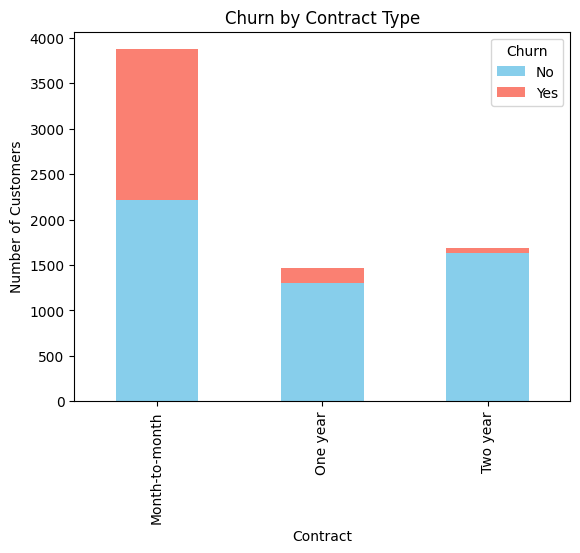

In [34]:
import matplotlib.pyplot as plt

churn_contract = df.groupby(["Contract", "Churn"]).size().unstack()
churn_contract.plot(kind="bar", color=["skyblue", "salmon"], stacked=True)
plt.title("Churn by Contract Type")
plt.ylabel("Number of Customers")
plt.show()


Month-to-month contracts have the highest churn, while long-term contracts greatly reduce churn risk.

### Financial Analysis:

Average Monthly Charges:

In [21]:
%sql SELECT Churn, AVG(MonthlyCharges) AS avg_monthly_charge \
FROM Telco \
GROUP BY Churn

 * sqlite:///TelcoCustomer.db
Done.


Churn,avg_monthly_charge
No,61.30740848343966
Yes,74.4413322632423


Customers with higher monthly charges are more likely to churn, linking higher costs to dissatisfaction.

Highest Monthly Charge:

In [22]:
%sql SELECT MAX(MonthlyCharges) AS MAX_MONTHLY_CHARGE FROM Telco

 * sqlite:///TelcoCustomer.db
Done.


MAX_MONTHLY_CHARGE
118.75


Services of the Highest-Paying Customer:

In [23]:
%sql SELECT PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies \
FROM Telco WHERE MonthlyCharges = (SELECT MAX(MonthlyCharges) FROM Telco )

 * sqlite:///TelcoCustomer.db
Done.


PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes


The top-paying customer uses nearly all services (including fiber optic), making them highly valuable but also at high risk of churn.

Lost Revenue from Churned Customers:

In [24]:
%sql SELECT SUM(MonthlyCharges) AS lost_revenue \
FROM Telco \
WHERE Churn = 'Yes'


 * sqlite:///TelcoCustomer.db
Done.


lost_revenue
139130.84999999986


Churned customers account for ~ USD 139K lost monthly revenue (~ USD 1.6M annually).


### Top Customers:

Top 10 by Total Charges:

In [25]:
%sql SELECT * FROM Telco \
ORDER BY TotalCharges DESC LIMIT 10

 * sqlite:///TelcoCustomer.db
Done.


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes
7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.5,8670.1,No
9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No
8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.2,8547.15,No
0675-NCDYU,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.4,8543.25,No
6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.5,No
0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.9,8496.7,No
1488-PBLJN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.7,No


Visualizing churn status in top 10 highest paying customers:

 * sqlite:///TelcoCustomer.db
Done.


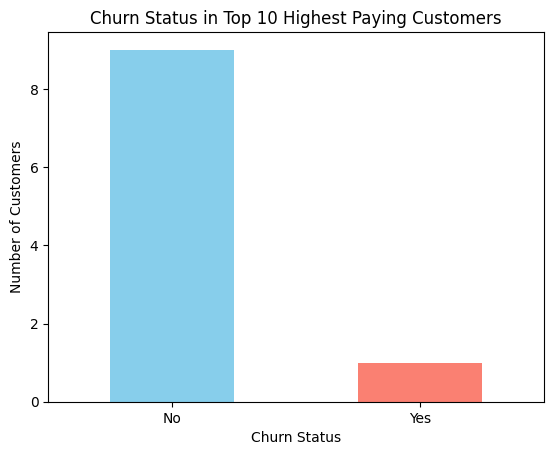

In [26]:
top10 = %sql SELECT customerID, Churn, TotalCharges \
             FROM Telco \
             ORDER BY TotalCharges DESC LIMIT 10;

top10_df = top10.DataFrame()

churn_counts = top10_df['Churn'].value_counts()

churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Churn Status in Top 10 Highest Paying Customers")
plt.ylabel("Number of Customers")
plt.xlabel("Churn Status")
plt.xticks(rotation=0)
plt.show()


2 of the Top 10 highest-paying customers churned, proving even premium customers are vulnerable.

### Payment Methods:

In [27]:
%sql SELECT PaymentMethod, Churn, COUNT(*) AS num_customers \
FROM Telco \
GROUP BY PaymentMethod, Churn \
ORDER BY PaymentMethod, num_customers DESC

 * sqlite:///TelcoCustomer.db
Done.


PaymentMethod,Churn,num_customers
Bank transfer (automatic),No,1284
Bank transfer (automatic),Yes,258
Credit card (automatic),No,1289
Credit card (automatic),Yes,232
Electronic check,No,1294
Electronic check,Yes,1071
Mailed check,No,1296
Mailed check,Yes,308


Visualizing churn by payment method:

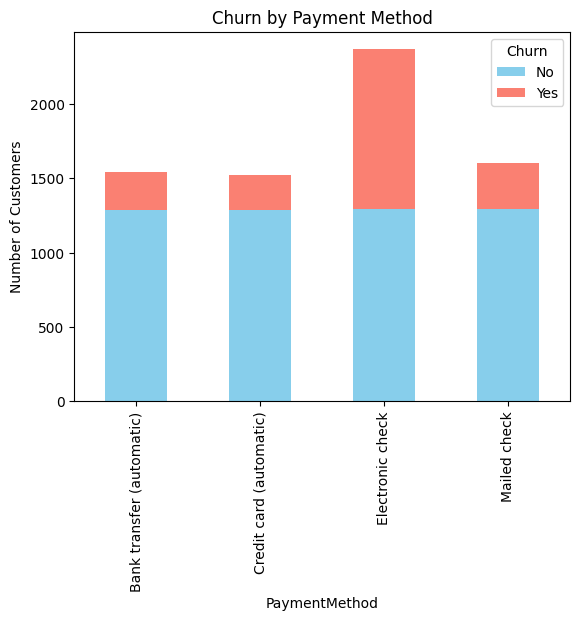

In [33]:
churn_payment = df.groupby(["PaymentMethod", "Churn"]).size().unstack()
churn_payment.plot(kind="bar", color=["skyblue", "salmon"], stacked=True)
plt.title("Churn by Payment Method")
plt.ylabel("Number of Customers")
plt.show()

Customers paying with electronic checks churn the most, making this group a key target for retention.

### Bundled Services:

In [29]:
%sql SELECT PhoneService, InternetService, StreamingTV, StreamingMovies, Churn, \
COUNT(*) AS num_customers FROM Telco \
GROUP BY PhoneService, InternetService, StreamingTV, StreamingMovies, Churn \
ORDER BY num_customers DESC;

 * sqlite:///TelcoCustomer.db
Done.


PhoneService,InternetService,StreamingTV,StreamingMovies,Churn,num_customers
Yes,No,No internet service,No internet service,No,1407
Yes,Fiber optic,Yes,Yes,No,817
Yes,DSL,No,No,No,617
Yes,Fiber optic,Yes,Yes,Yes,493
Yes,Fiber optic,No,No,No,483
Yes,Fiber optic,No,No,Yes,422
Yes,DSL,Yes,Yes,No,394
Yes,Fiber optic,No,Yes,No,253
Yes,Fiber optic,Yes,No,No,246
Yes,DSL,No,Yes,No,223


Customers with only phone service are the most loyal, while fiber optic bundles with multiple add-ons see higher churn.

### Average Total Charges by Churn:

In [30]:
%sql SELECT Churn, AVG(TotalCharges) AS avg_total_charges \
FROM Telco GROUP BY Churn

 * sqlite:///TelcoCustomer.db
Done.


Churn,avg_total_charges
No,2555.3441410032997
Yes,1531.7960941680035


Loyal customers (non-churn) tend to have higher average total charges than those who leave.

## 4. Conclusion:

### Key Findings
- **Churn rate**: 26.5%
- **Higher churn risk**: seniors, customers without partners/dependents, and those on month-to-month contracts.  
- **Service risk**: fiber optic internet & high monthly charges linked to churn.  
- **Payment method**: electronic check users churn the most.  
- **Revenue**: loyal customers spend more overall.


### Business Recommendations
- Promote long-term contracts to reduce churn.  
- Offer targeted retention deals for seniors & high-charge customers.  
- Encourage alternative payment methods instead of electronic checks
